<a href="https://colab.research.google.com/github/simoneminorr/linear_models_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

In [1]:
! git clone https://github.com/ds3001f25/linear_models_assignment.git

Cloning into 'linear_models_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 6 (from 1)
Receiving objects: 100% (9/9), 18.05 KiB | 3.61 MiB/s, done.


**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

1. Write down the SSE for this model.

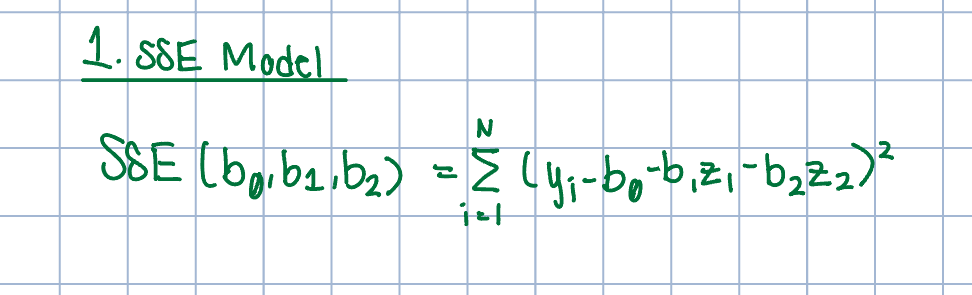

2. Take partial derivatives with respect to  𝑏0 ,  𝑏1 , and  𝑏2 .

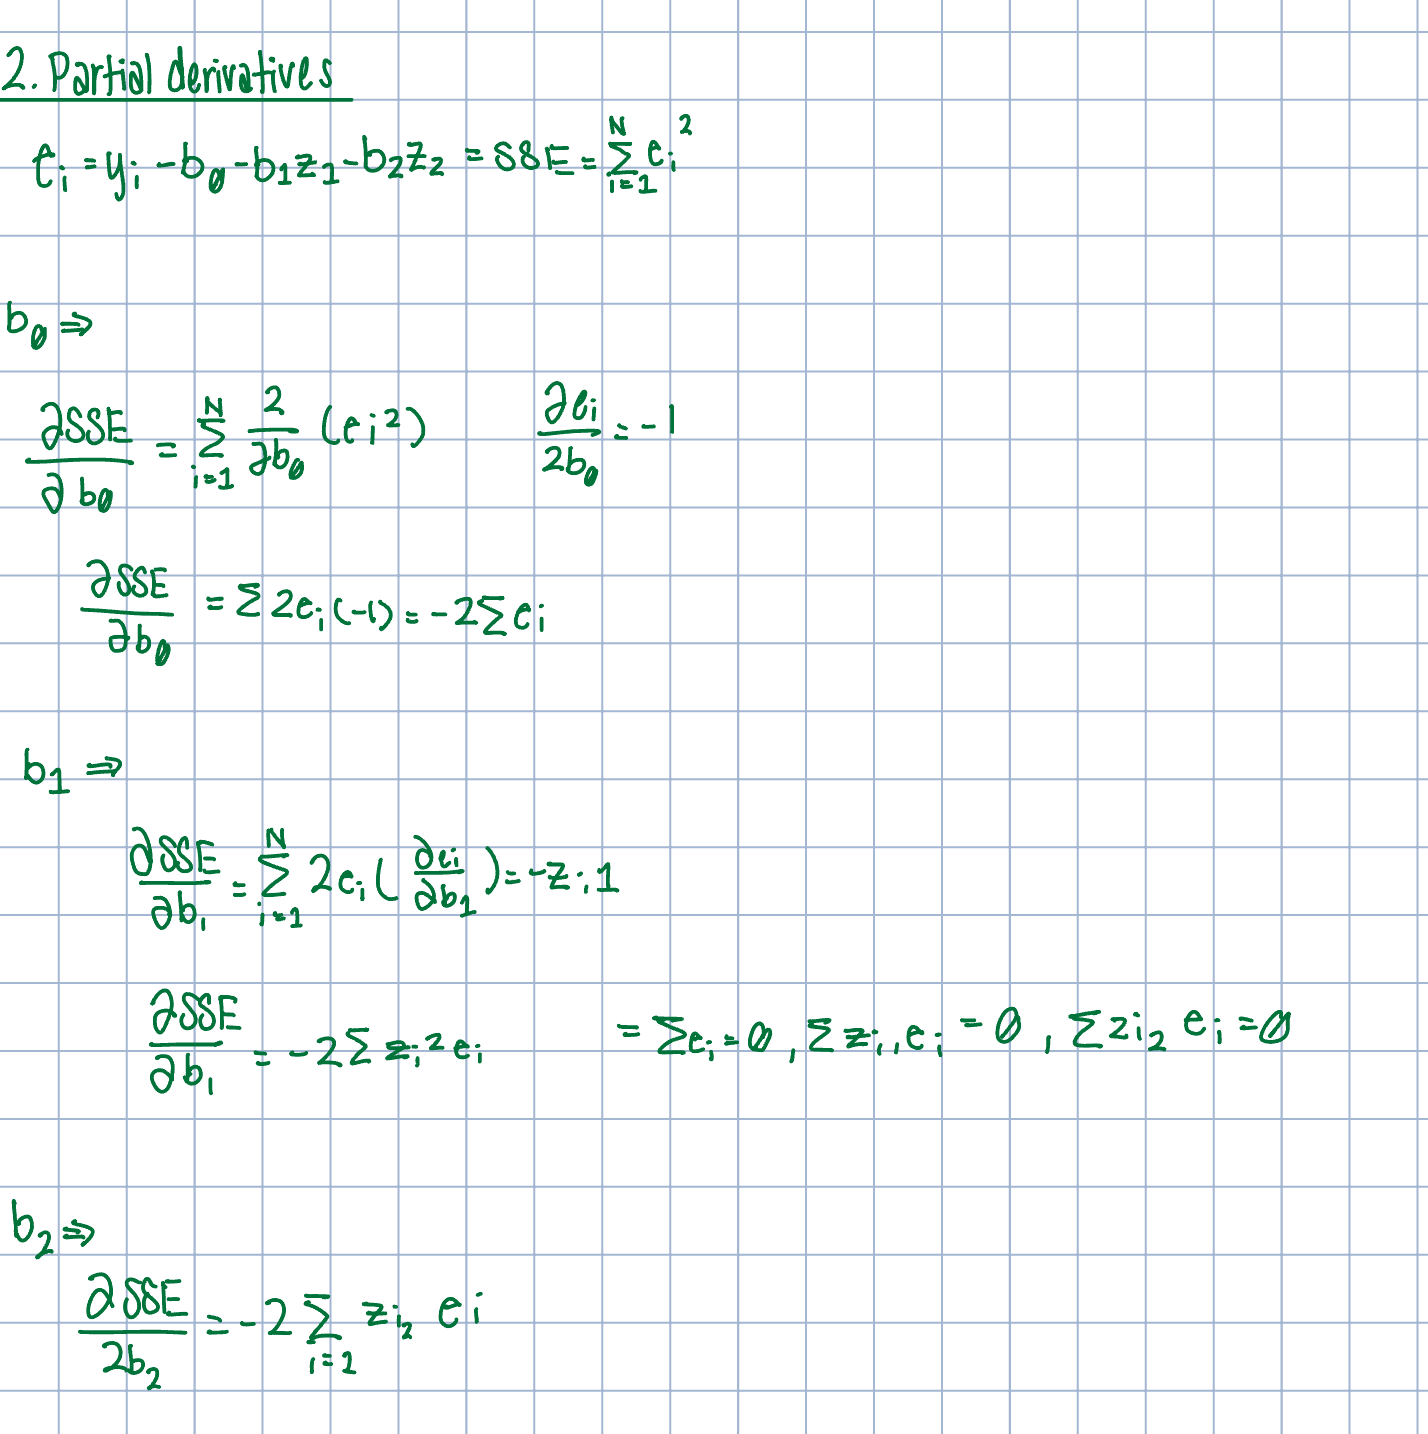

3. Verify that the average error is zero and  𝑒⋅𝑧=0  at the optimum, just as in the single linear regression case.

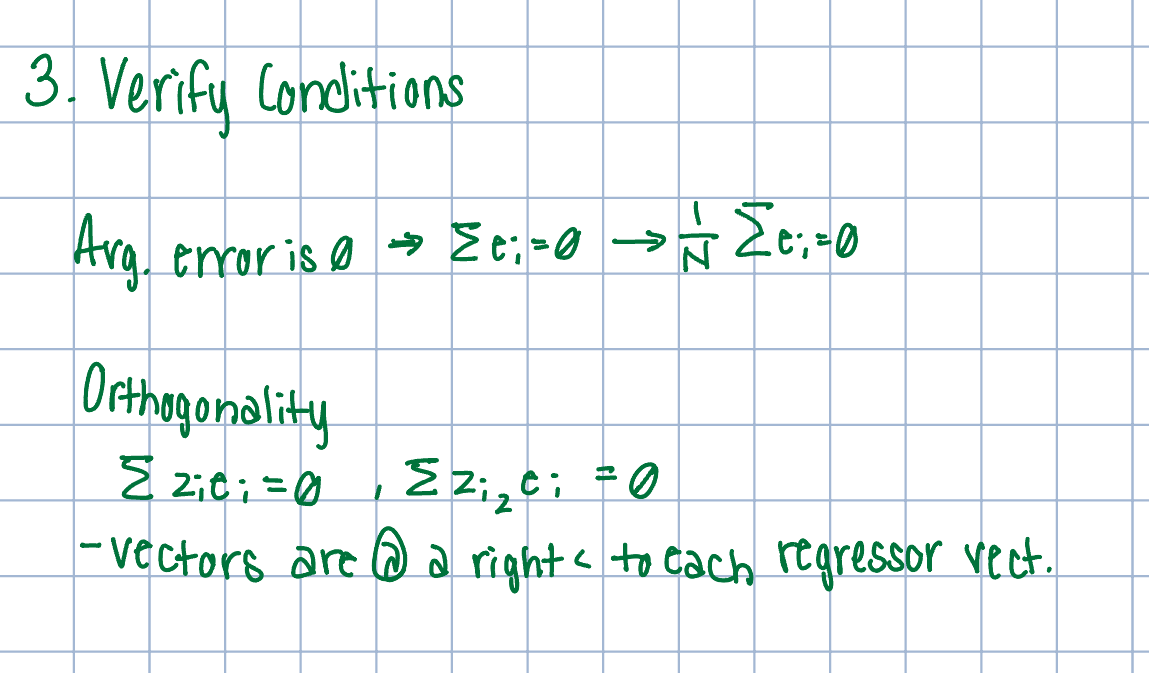

4. Show that the optimal intercept is  𝑏∗0=𝑦¯ . Eliminate  𝑏∗0  from the remaining equations, and focus on  𝑏1  and  𝑏2 .

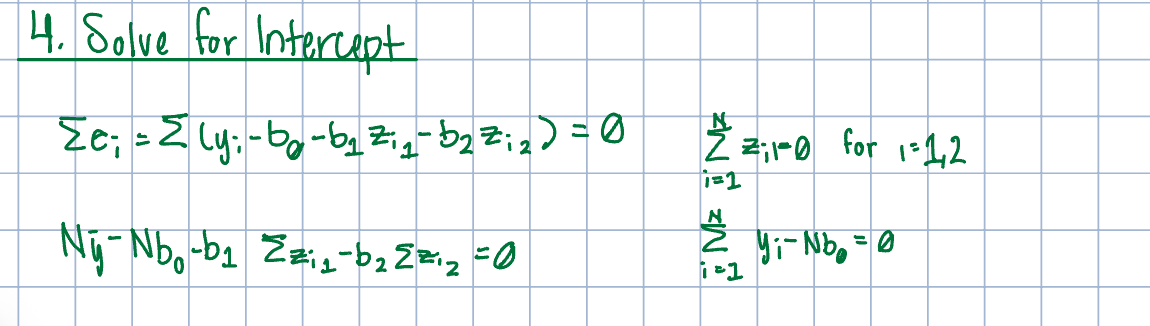

5. Write your results as a matrix equation in the form " 𝐴𝑏=𝐶 ". These are called the normal equations.

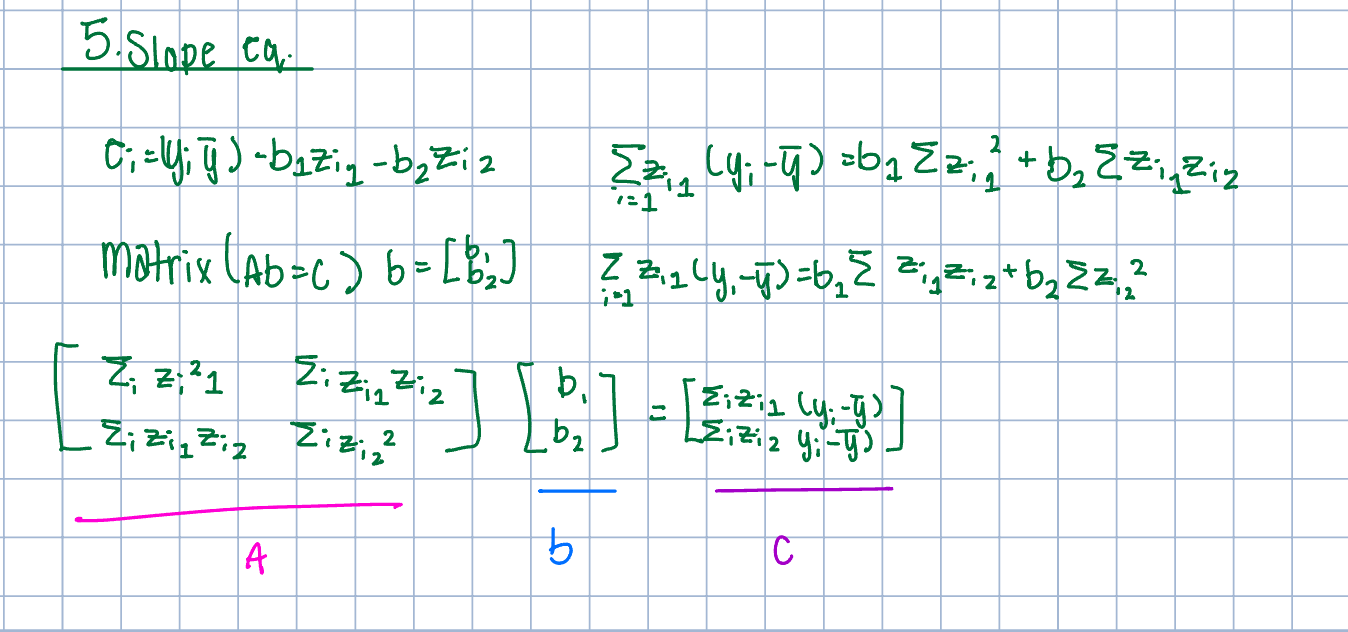

6. Divide both sides by  𝑁  and substitute  𝑧𝑖𝑗=𝑥𝑖𝑗−𝑚𝑗  back into your normal equations for  𝑥𝑖𝑗 . What is the matrix  𝐴 ? What is the vector  𝐶 ? Explain the intuition of your discovery.

A: The intuition of my discovery is as follows. If B=(b1,b2) is chosen to satisfy ExxB and Exy, then the slopes are covariances with y scaled by the regressors' own covariance structure adjusting each slope for correlation among x1, x2. If x1 and x2 were uncorrelated then it would reduce to bi=(cov(xi,y)/var(xi))

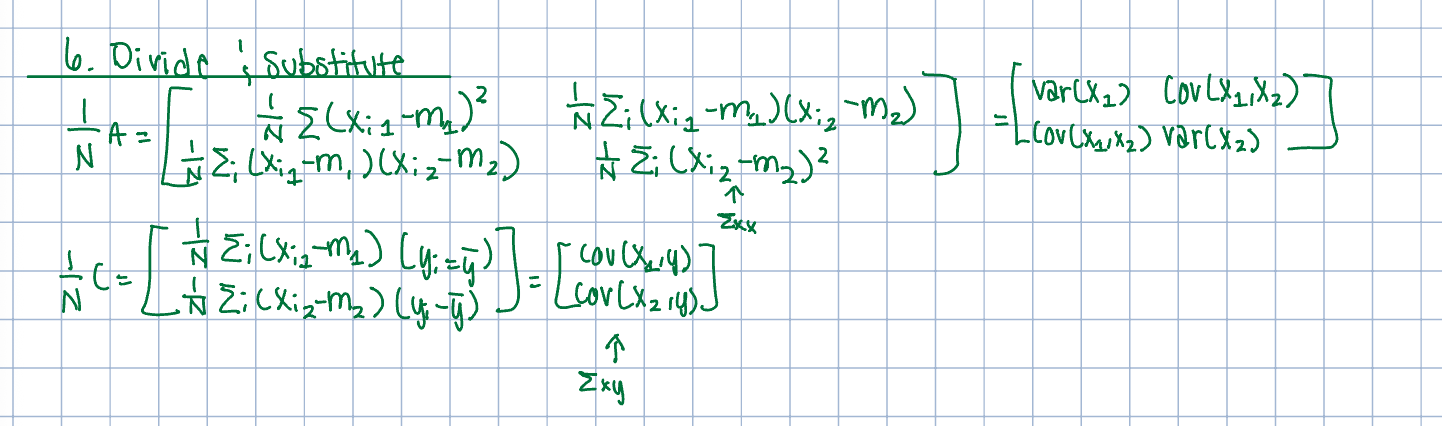

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

1. Load cars_hw.csv. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cars = pd.read_csv('/content/linear_models_assignment/data/cars_hw.csv')
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

A: The most expensive car brands are MG Motors (in higher proportion) and Tata. Most prices fall within the same price region between and 0 and 1 of 1e6.

<Axes: xlabel='Price', ylabel='Density'>

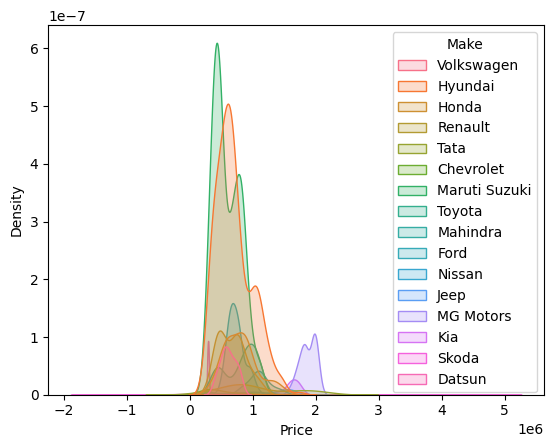

In [3]:
#grouping cars by make
grouped_cars_make = cars.groupby('Make')

#making kernel density plot by 'Make'
sns.kdeplot(data=cars, x='Price', hue='Make', fill=True)

3. Split the data into an 80% training set and a 20% testing set.

In [4]:
#splitting data 80 for training and 20 for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(cars, test_size=0.2, random_state=42)

4. Make a model where you regress price on the numeric variables alone; what is the  𝑅2  and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the  𝑅2  and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  𝑅2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?

A: For first model:
R-squared on training set (numeric variables): 0.31444462126021566
RMSE on training set (numeric variables): 309338.3729572164
R-squared on test set (numeric variables): 0.29407012364750873
RMSE on test set (numeric variables): 284546.9519072158

For second model:
R-squared:  0.7225137375433996
RMSE:  193395.65351063522

The second (categorical) model performs better on the test set because the R squared is higher than in the first model which meants that the categorical variable account for a large portion of the variation in car prices. In addition, the error for this model is less.  

For third model: R-squared on test set (combined variables): 0.7887356316510599
RMSE on test set (combined variables): 155663.31835367443

The joint mdoel performs better because incorperating numeric and categorical variables create a more comprehensive vire of the data which captures the relationships more dimensionally. The car price is evidently influence by a mixture of numeric and categorical factors, like mileage, color (custom paint), and brand, etc.

In [14]:
# Select numeric variables
numeric_cols = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']

X_train_numeric = train[numeric_cols]
X_test_numeric = test[numeric_cols]
y_train = train['Price']
y_test = test['Price']

# Create and train the linear regression model
model_numeric = LinearRegression()
model_numeric.fit(X_train_numeric, y_train)

# Evaluate the model on the training set
y_train_pred_numeric = model_numeric.predict(X_train_numeric)
r2_train_numeric = r2_score(y_train, y_train_pred_numeric)
rmse_train_numeric = mean_squared_error(y_train, y_train_pred_numeric)**0.5

print(f"R-squared on training set (numeric variables): {r2_train_numeric}")
print(f"RMSE on training set (numeric variables): {rmse_train_numeric}")

# Evaluate the model on the test set
y_test_pred_numeric = model_numeric.predict(X_test_numeric)
r2_test_numeric = r2_score(y_test, y_test_pred_numeric)
rmse_test_numeric = mean_squared_error(y_test, y_test_pred_numeric)**0.5

print(f"R-squared on test set (numeric variables): {r2_test_numeric}")
print(f"RMSE on test set (numeric variables): {rmse_test_numeric}")

R-squared on training set (numeric variables): 0.31444462126021566
RMSE on training set (numeric variables): 309338.3729572164
R-squared on test set (numeric variables): 0.29407012364750873
RMSE on test set (numeric variables): 284546.9519072158


In [15]:
#regressing price based on categorical variables alone with one-hot encoded
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#Target variable
Y = cars['Price']

X_d = pd.get_dummies(cars[['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission_Type']], dtype='int')

# Regression:
from sklearn.linear_model import LinearRegression # Import linear regression model

reg = LinearRegression(fit_intercept=False).fit(X_d, Y) # Fit the linear model
print('R-squared: ', reg.score(X_d, Y)) # R squared measure

# Calculate RMSE
y_pred = reg.predict(X_d)
rmse = mean_squared_error(Y, y_pred)**0.5
print('RMSE: ', rmse)

R-squared:  0.7225137375433996
RMSE:  193395.65351063522


In [19]:
# Select categorical variables and one-hot encode them for the training set
categorical_cols = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission_Type']
X_train_categorical = pd.get_dummies(train[categorical_cols], dtype='int')

# Combine numeric and categorical features for the training set
X_train_combined = pd.concat([X_train_numeric, X_train_categorical], axis=1)

# Select categorical variables and one-hot encode them for the test set
X_test_categorical = pd.get_dummies(test[categorical_cols], dtype='int')

# Combine numeric and categorical features for the test set
X_test_combined = pd.concat([X_test_numeric, X_test_categorical], axis=1)

# Ensure that the columns in the training and test sets are the same after one-hot encoding
# This is important if a category is present in the test set but not in the training set, or vice versa
train_cols = X_train_combined.columns
test_cols = X_test_combined.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_combined[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_combined[c] = 0

X_test_combined = X_test_combined[train_cols]


# Create and train the linear regression model with combined features
model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)

# Evaluate the combined model on the test set
y_test_pred_combined = model_combined.predict(X_test_combined)
r2_test_combined = r2_score(y_test, y_test_pred_combined)
rmse_test_combined = mean_squared_error(y_test, y_test_pred_combined)**0.5

print(f"R-squared on test set (combined variables): {r2_test_combined}")
print(f"RMSE on test set (combined variables): {rmse_test_combined}")

R-squared on test set (combined variables): 0.7887356316510599
RMSE on test set (combined variables): 155663.31835367443


In [23]:
# Select categorical variables and one-hot encode them for the training set
categorical_cols = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission_Type']
X_train_categorical = pd.get_dummies(train[categorical_cols], dtype='int')

# Combine numeric and categorical features for the training set
X_train_combined = pd.concat([X_train_numeric, X_train_categorical], axis=1)

# Select categorical variables and one-hot encode them for the test set
X_test_categorical = pd.get_dummies(test[categorical_cols], dtype='int')

# Combine numeric and categorical features for the test set
X_test_combined = pd.concat([X_test_numeric, X_test_categorical], axis=1)

# Ensure that the columns in the training and test sets are the same after one-hot encoding
# This is important if a category is present in the test set but not in the training set, or vice versa
train_cols = X_train_combined.columns
test_cols = X_test_combined.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_combined[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_combined[c] = 0

X_test_combined = X_test_combined[train_cols]


# Create and train the linear regression model with combined features
model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train)

# Evaluate the combined model on the test set
y_test_pred_combined = model_combined.predict(X_test_combined)
r2_test_combined = r2_score(y_test, y_test_pred_combined)
rmse_test_combined = mean_squared_error(y_test, y_test_pred_combined)**0.5

print(f"R-squared on test set (combined variables): {r2_test_combined}")
print(f"RMSE on test set (combined variables): {rmse_test_combined}")

R-squared on test set (combined variables): 0.7887356316510599
RMSE on test set (combined variables): 155663.31835367443


In [24]:
#regressing price based on numeric variables alone
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#Target variable
Y= cars['Price']

X_d = pd.get_dummies(cars['Make'], dtype='int')

# Regression:
from sklearn.linear_model import LinearRegression # Import linear regression model

reg = LinearRegression(fit_intercept=False).fit(X_d, Y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X_d, Y)) # R squared measure
results

R-squared:  0.5203564146667529


,variable,coefficient
0,Chevrolet,4.535000e+05
1,Datsun,2.896667e+05
2,Ford,7.211731e+05
3,Honda,7.989726e+05
4,Hyundai,6.918918e+05
5,Jeep,1.499500e+06
6,Kia,1.614750e+06
7,MG Motors,1.869457e+06
8,Mahindra,1.100167e+06
9,Maruti Suzuki,5.887850e+05


Q: what is the 𝑅2 and RMSE on the training set and test set?
A: The 𝑅2 and RMSE on the training set and test set are 0.5203564146667529

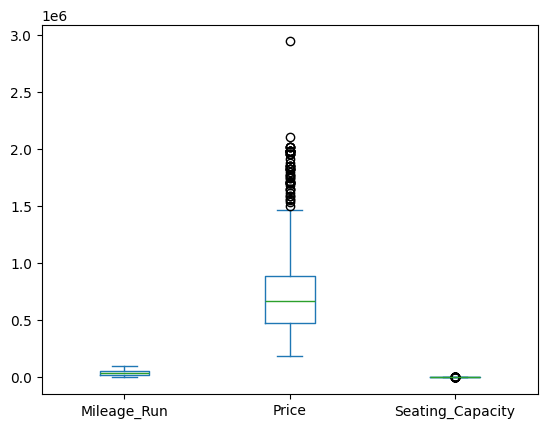

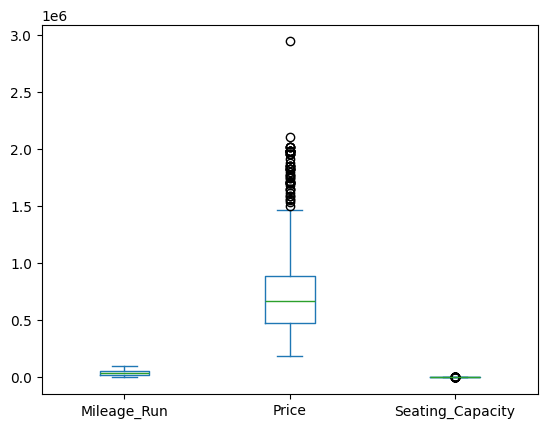

In [25]:
## More complex regression on brand and numeric values:

# Target Variable
y = cars['Price']

# Initial boxplot:
cars.loc[:,['Mileage_Run','Price','Seating_Capacity']].plot.box()

# Winsorize using .apply:
from scipy.stats.mstats import winsorize
cars.loc[:, ['Mileage_Run','Price','Seating_Capacity'] ] = cars.loc[:,['Mileage_Run','Price','Seating_Capacity'] ].apply(winsorize)

# Final boxplot:
cars.loc[:,['Mileage_Run','Price','Seating_Capacity']].plot.box()

# Expand numeric variables:
from sklearn.preprocessing import PolynomialFeatures
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
X_num = cars.loc[:,['Mileage_Run']]
Z = expander.fit_transform(X_num) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_num = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

# Concatenate
X = pd.concat( [X_num, X_d],axis=1)

In [26]:
#Target variable
y= cars['Price']

x_d = pd.get_dummies(cars['Make','Color','Body_Type','Fuel_Type'], dtype='int')

# Regression:
from sklearn.linear_model import LinearRegression # Import linear regression model

reg2 = LinearRegression(fit_intercept=False).fit(x_d, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X_d, Y)) # R squared measure
results

KeyError: ('Make', 'Color', 'Body_Type', 'Fuel_Type')

In [27]:
#Target variable
y = cars['Price']

x_d = pd.get_dummies(cars[['Make','Color','Body_Type','Fuel_Type']], dtype='int')

# Regression:
from sklearn.linear_model import LinearRegression # Import linear regression model

reg2 = LinearRegression(fit_intercept=False).fit(x_d, y) # Fit the linear model
print('R-squared: ', reg2.score(x_d, y)) # R squared measure

# Calculate RMSE
y_pred = reg2.predict(x_d)
rmse = mean_squared_error(y, y_pred)**0.5
print('RMSE: ', rmse)

R-squared:  0.7112212197872956
RMSE:  197291.60433300002


5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the  𝑅2  and RMSE change? At what point does  𝑅2  go negative on the test set? For your best model with expanded features, what is the  𝑅2  and RMSE? How does it compare to your best model from part 4?

A: As the degrees increase, R-squared increased marignally between one and two degrees and then decreases significantly between two and three. RSME shifts marginally down from degree one to two but increases a lot between two and three.

R-squard does not go negative between the degrees I initally tested it on (1-10). After expanding it to 25, R-squared proved to go negative at degree 17.

The best model will have the highest R-squared and lowest RMSE which appears to be at degree two where R-squared is 0.7936917365480407 and RMSE is 153826.60965507373. This is marginally different if not practically the same in comparison to the joint model from question four.

First three degrees:

Evaluating model with polynomial degree: 1
R-squared on test set: 0.7887356316510634
RMSE on test set: 155663.31835367315

Evaluating model with polynomial degree: 2
R-squared on test set: 0.7936917365480407
RMSE on test set: 153826.60965507373

Evaluating model with polynomial degree: 3
R-squared on test set: 0.3115438258126506
RMSE on test set: 281003.2262044392

In [34]:
from sklearn.preprocessing import PolynomialFeatures

# Select numeric variables
numeric_cols = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
X_train_numeric = train[numeric_cols]
X_test_numeric = test[numeric_cols]

# Select categorical variables and one-hot encode them
categorical_cols = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission_Type']
X_train_categorical = pd.get_dummies(train[categorical_cols], dtype='int')
X_test_categorical = pd.get_dummies(test[categorical_cols], dtype='int')

# Confirm consistent columns after one-hot encoding
train_cols_cat = X_train_categorical.columns
test_cols_cat = X_test_categorical.columns

missing_in_test_cat = set(train_cols_cat) - set(test_cols_cat)
for c in missing_in_test_cat:
    X_test_categorical[c] = 0

missing_in_train_cat = set(test_cols_cat) - set(train_cols_cat)
for c in missing_in_train_cat:
    X_train_categorical[c] = 0

X_test_categorical = X_test_categorical[train_cols_cat]

# Iterate through different polynomial degrees
for degree in range(1, 26): # Checking degrees 1-25
    print(f"\nEvaluating model with polynomial degree: {degree}")

    # Create polynomial features for numeric variables
    expander = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_numeric_poly = expander.fit_transform(X_train_numeric)
    X_test_numeric_poly = expander.transform(X_test_numeric) # Use transform on test set

    # Convert polynomial features back to df with meaningful names
    poly_names = expander.get_feature_names_out(numeric_cols)
    X_train_numeric_poly_df = pd.DataFrame(X_train_numeric_poly, columns=poly_names, index=train.index)
    X_test_numeric_poly_df = pd.DataFrame(X_test_numeric_poly, columns=poly_names, index=test.index)

    # Combine polynomial numeric features and categorical features
    X_train_combined_poly = pd.concat([X_train_numeric_poly_df, X_train_categorical], axis=1)
    X_test_combined_poly = pd.concat([X_test_numeric_poly_df, X_test_categorical], axis=1)

    # Establish consistent columns after combining (important if polynomial features introduce new columns)
    train_cols_poly = X_train_combined_poly.columns
    test_cols_poly = X_test_combined_poly.columns

    missing_in_test_poly = set(train_cols_poly) - set(test_cols_poly)
    for c in missing_in_test_poly:
        X_test_combined_poly[c] = 0

    missing_in_train_poly = set(test_cols_poly) - set(train_cols_poly)
    for c in missing_in_train_poly:
        X_train_combined_poly[c] = 0

    X_test_combined_poly = X_test_combined_poly[train_cols_poly]


    # Create and train the linear regression model
    model_poly = LinearRegression()
    model_poly.fit(X_train_combined_poly, y_train)

    # Evaluate the model on the test set
    y_test_pred_poly = model_poly.predict(X_test_combined_poly)
    r2_test_poly = r2_score(y_test, y_test_pred_poly)
    rmse_test_poly = mean_squared_error(y_test, y_test_pred_poly)**0.5

    print(f"R-squared on test set: {r2_test_poly}")
    print(f"RMSE on test set: {rmse_test_poly}")

    # Check if R-squared is negative
    if r2_test_poly < 0:
        print(f"R-squared went negative at degree {degree}")
        break # stop if R-squared goes negative


Evaluating model with polynomial degree: 1
R-squared on test set: 0.7887356316510634
RMSE on test set: 155663.31835367315

Evaluating model with polynomial degree: 2
R-squared on test set: 0.7936917365480407
RMSE on test set: 153826.60965507373

Evaluating model with polynomial degree: 3
R-squared on test set: 0.3115438258126506
RMSE on test set: 281003.2262044392

Evaluating model with polynomial degree: 4
R-squared on test set: 0.3078718149464432
RMSE on test set: 281751.62146057235

Evaluating model with polynomial degree: 5
R-squared on test set: 0.2911168596449434
RMSE on test set: 285141.5330667626

Evaluating model with polynomial degree: 6
R-squared on test set: 0.29353602304492754
RMSE on test set: 284654.5744688632

Evaluating model with polynomial degree: 7
R-squared on test set: 0.1327610151333175
RMSE on test set: 315386.10287414404

Evaluating model with polynomial degree: 8
R-squared on test set: 0.07253996304433075
RMSE on test set: 326152.5356597521

Evaluating model 

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

A: The predicted values and true values roughly line up along the diagonal. The residuals look roughly bell-shaped around the O. One of the strengths of the model is the explaination of variance in the car prices and predictions were generally in alignment. A weakness is that there is still some variability that is seenparticularly with high-priced cares where we see the residual line is slightly off on the right tail. Other than that, the final model is a decent predictor of car prices based on car features.

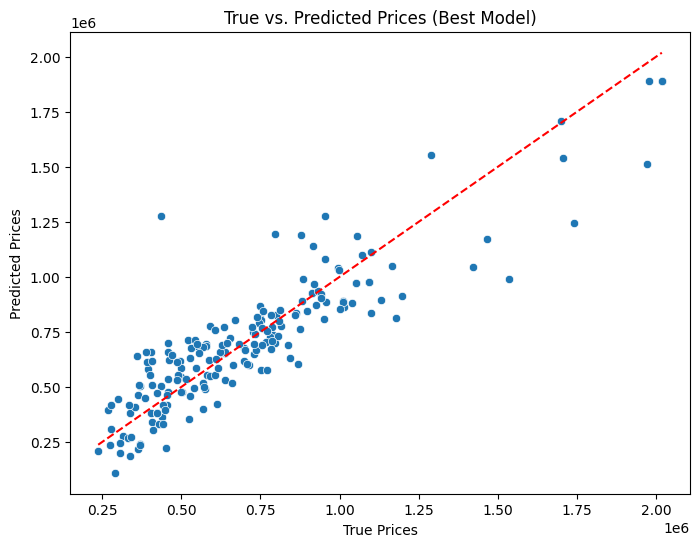

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select numeric variables
numeric_cols = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
X_train_numeric = train[numeric_cols]
X_test_numeric = test[numeric_cols]
y_train = train['Price']
y_test = test['Price']

# Select categorical variables and one-hot encode them
categorical_cols = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission_Type']
X_train_categorical = pd.get_dummies(train[categorical_cols], dtype='int')
X_test_categorical = pd.get_dummies(test[categorical_cols], dtype='int')

# Ensure consistent columns after one-hot encoding
train_cols_cat = X_train_categorical.columns
test_cols_cat = X_test_categorical.columns

missing_in_test_cat = set(train_cols_cat) - set(test_cols_cat)
for c in missing_in_test_cat:
    X_test_categorical[c] = 0

missing_in_train_cat = set(test_cols_cat) - set(train_cols_cat)
for c in missing_in_train_cat:
    X_train_categorical[c] = 0

X_test_categorical = X_test_categorical[train_cols_cat]


# Create polynomial features for numeric variables with degree 2 (best model degree)
degree = 2
expander = PolynomialFeatures(degree=degree, include_bias=False)
X_train_numeric_poly = expander.fit_transform(X_train_numeric)
X_test_numeric_poly = expander.transform(X_test_numeric) # Use transform on test set

# Convert polynomial features back to DataFrame with meaningful names
poly_names = expander.get_feature_names_out(numeric_cols)
X_train_numeric_poly_df = pd.DataFrame(X_train_numeric_poly, columns=poly_names, index=train.index)
X_test_numeric_poly_df = pd.DataFrame(X_test_numeric_poly, columns=poly_names, index=test.index)


# Combine polynomial numeric features and categorical features
X_train_combined_poly = pd.concat([X_train_numeric_poly_df, X_train_categorical], axis=1)
X_test_combined_poly = pd.concat([X_test_numeric_poly_df, X_test_categorical], axis=1)

# Ensure consistent columns after combining (important if polynomial features introduce new columns)
train_cols_poly = X_train_combined_poly.columns
test_cols_poly = X_test_combined_poly.columns

missing_in_test_poly = set(train_cols_poly) - set(test_cols_poly)
for c in missing_in_test_poly:
    X_test_combined_poly[c] = 0

missing_in_train_poly = set(test_cols_poly) - set(train_cols_poly)
for c in missing_in_train_poly:
    X_train_combined_poly[c] = 0

X_test_combined_poly = X_test_combined_poly[train_cols_poly]


# Create and train the linear regression model
model_poly = LinearRegression()
model_poly.fit(X_train_combined_poly, y_train)

# Determine predicted values for the test data
y_test_pred = model_poly.predict(X_test_combined_poly)

# Plot predicted values against true values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs. Predicted Prices (Best Model)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Add diagonal line
plt.show()

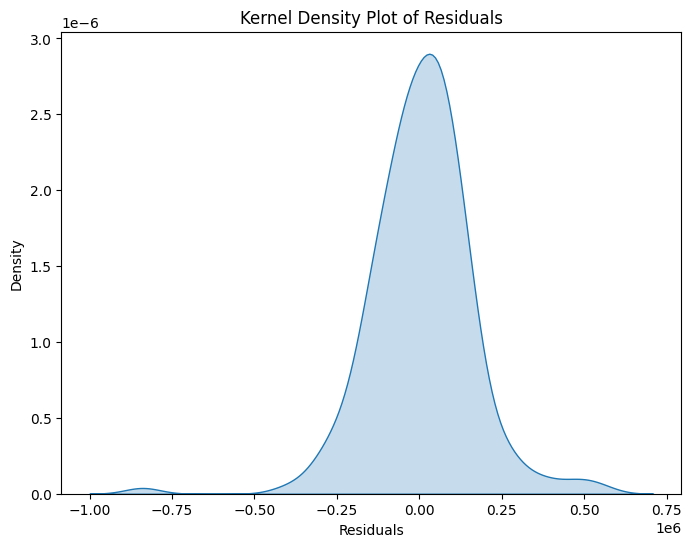

In [37]:
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, fill=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Residuals")
plt.show()

In [42]:
from sklearn.metrics import r2_score, mean_squared_error

#Evaluate strengths and weaknesses
print(f"R-squared on test set: {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE on test set: {mean_squared_error(y_test, y_test_pred)**0.5:.4f}")

R-squared on test set: 0.7937
RMSE on test set: 153826.6097


**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?